=== MISSING VALUES ===
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Missing values handled by dropping 229 rows.
New dataset size: 6378 rows.

=== DUPLICATES ===
Number of duplicate rows found: 0
No duplicate rows found.

=== UNIVARIATE ANALYSIS ===


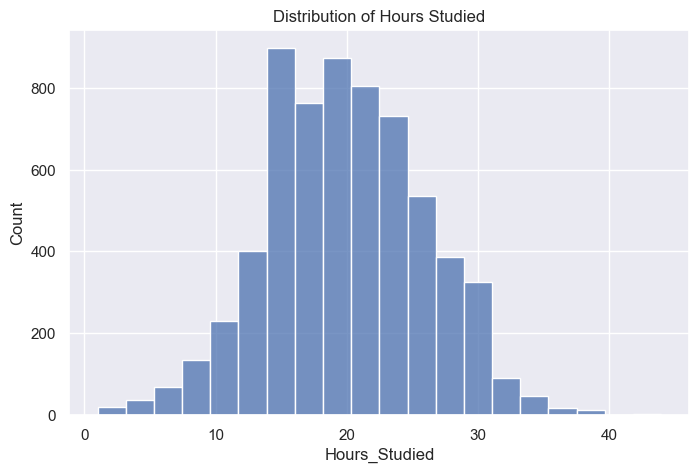

- Hours studied range: 1 to 44 hours
- Average study time: 20.0 hours


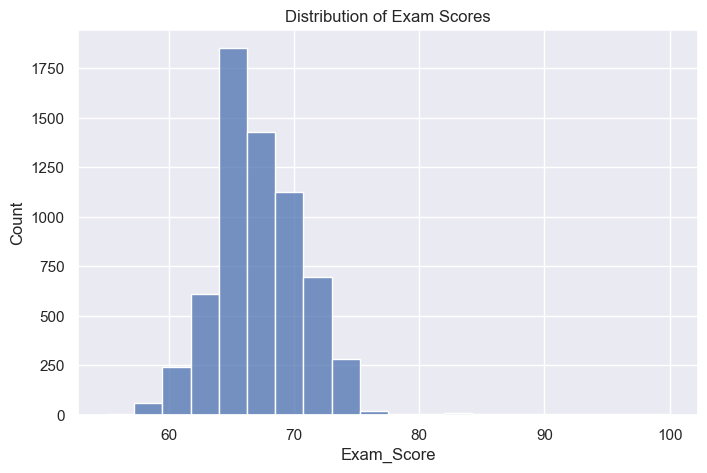

- Exam scores range: 55 to 100
- Average exam score: 67.3
- Score distribution shows most students score between 60-80

=== BIVARIATE ANALYSIS ===


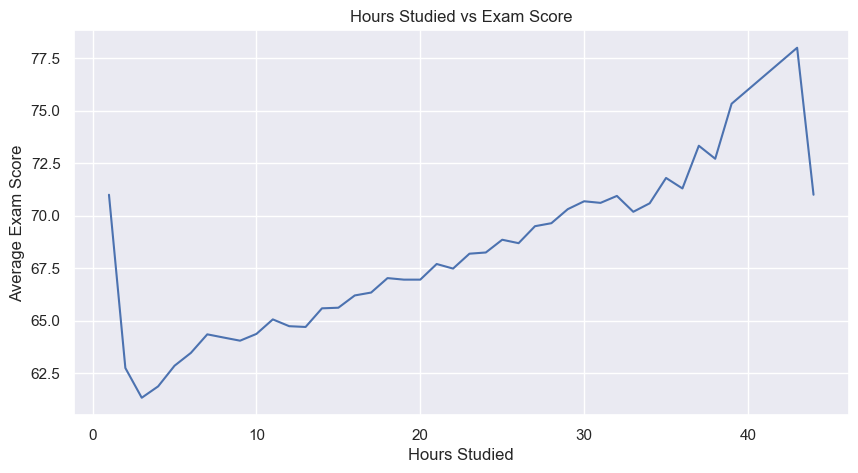

- Positive relationship: more study hours generally lead to higher scores


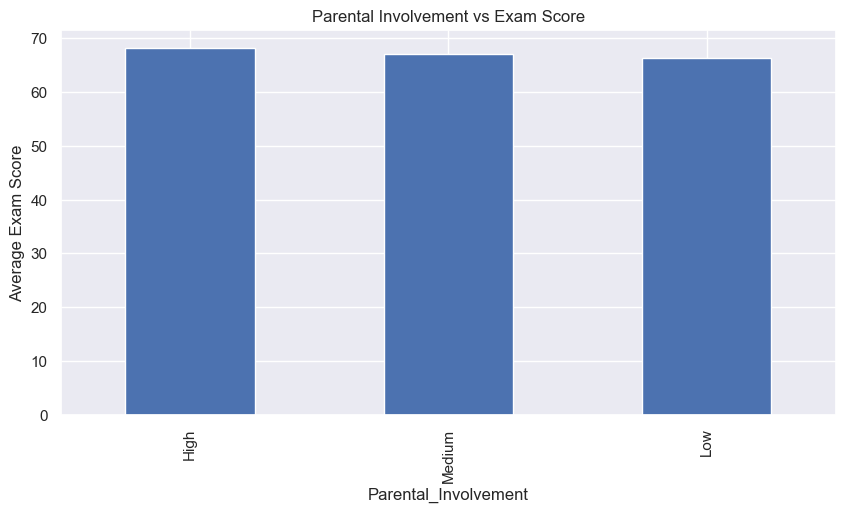

- Highest performing group: High involvement (avg score: 68.1)
- Parental involvement shows clear impact on student performance


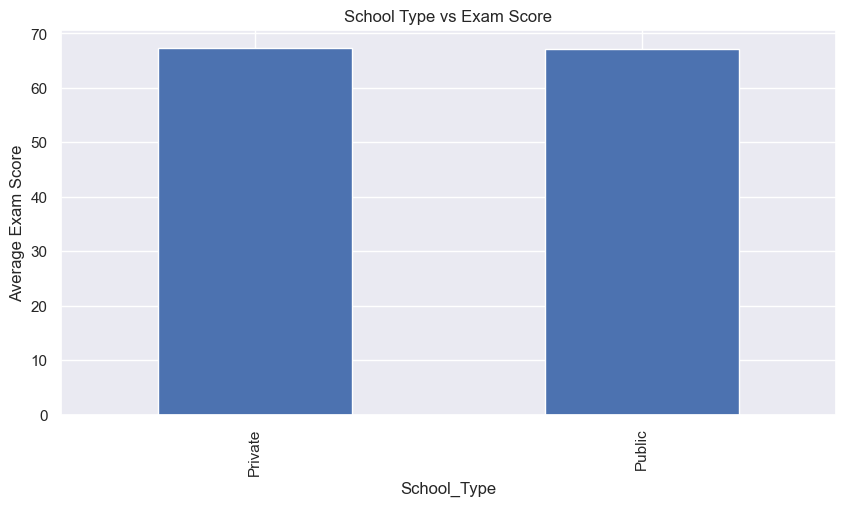

- Public School Average Score: 67.2
- Private School Average Score: 67.3
- School type contributes to performance variation

=== BIVARIATE ANALYSIS ===


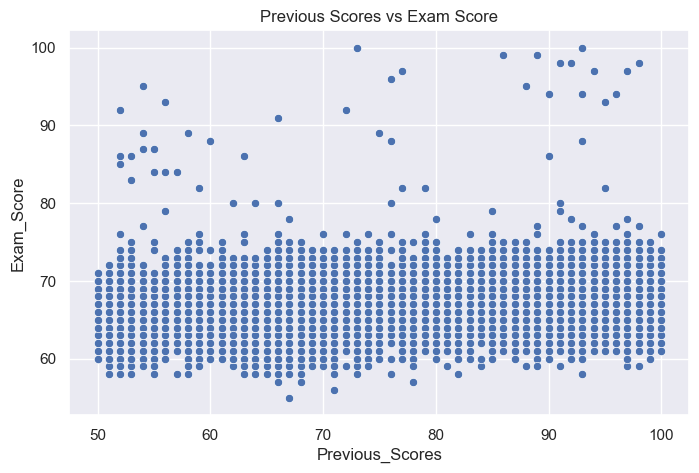

- Weak positive correlation (0.17) between previous and current scores

=== CORRELATION ANALYSIS ===


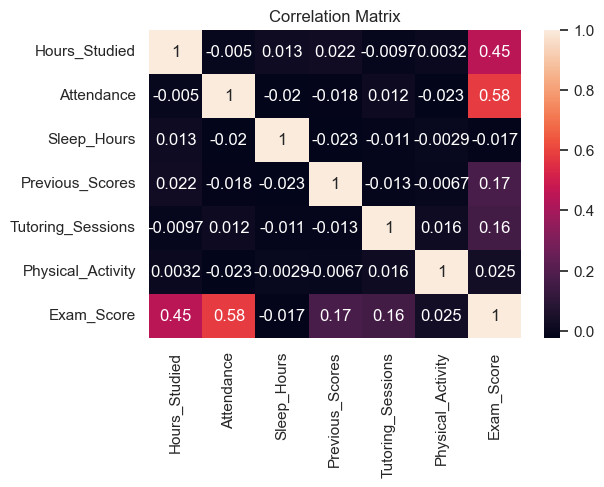

Correlation close to 1= strong positive relationship
Close to 0= weak relationship
The correlation matrix shows a strong positive correlation between Attendance and Exam_Score.
This suggests that while this factor contributes to exam performance, it is not the sole determining factor.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_csv("StudentPerformanceFactors.csv")
df.head(7)

df.dtypes

print("=== MISSING VALUES ===")
print(df.isna().sum())

rows_before = len(df)
df = df.dropna()
rows_after = len(df)
print(f"\nMissing values handled by dropping {rows_before - rows_after} rows.")
print(f"New dataset size: {rows_after} rows.")

print("\n=== DUPLICATES ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")
df.describe(include='all')

print("\n=== UNIVARIATE ANALYSIS ===")
plt.figure(figsize=(8,5))
sns.histplot(df['Hours_Studied'], bins=20)
plt.title("Distribution of Hours Studied")
plt.show()
print(f"- Hours studied range: {df['Hours_Studied'].min()} to {df['Hours_Studied'].max()} hours")
print(f"- Average study time: {df['Hours_Studied'].mean():.1f} hours")

plt.figure(figsize=(8,5))
sns.histplot(df['Exam_Score'], bins=20)
plt.title("Distribution of Exam Scores")
plt.show()
print(f"- Exam scores range: {df['Exam_Score'].min()} to {df['Exam_Score'].max()}")
print(f"- Average exam score: {df['Exam_Score'].mean():.1f}")
print("- Score distribution shows most students score between 60-80")

print("\n=== BIVARIATE ANALYSIS ===")
hours_score = df.groupby('Hours_Studied')['Exam_Score'].mean()
plt.figure(figsize=(10,5))
hours_score.plot(kind='line')
plt.title("Hours Studied vs Exam Score")
plt.ylabel("Average Exam Score")
plt.xlabel("Hours Studied")
plt.show()
print("- Positive relationship: more study hours generally lead to higher scores")

involvement_score = df.groupby('Parental_Involvement')['Exam_Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
involvement_score.plot(kind='bar')
plt.title("Parental Involvement vs Exam Score")
plt.ylabel("Average Exam Score")
plt.show()
print(f"- Highest performing group: {involvement_score.index[0]} involvement (avg score: {involvement_score.iloc[0]:.1f})")
print("- Parental involvement shows clear impact on student performance")

school_score = df.groupby('School_Type')['Exam_Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
school_score.plot(kind='bar')
plt.title("School Type vs Exam Score")
plt.ylabel("Average Exam Score")
plt.show()
public_avg = df[df['School_Type'] == 'Public']['Exam_Score'].mean()
private_avg = df[df['School_Type'] == 'Private']['Exam_Score'].mean()
print(f"- Public School Average Score: {public_avg:.1f}")
print(f"- Private School Average Score: {private_avg:.1f}")
print("- School type contributes to performance variation")

print("\n=== BIVARIATE ANALYSIS ===")
plt.figure(figsize=(8,5))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=df)
plt.title("Previous Scores vs Exam Score")
plt.show()
correlation_prev = df[['Previous_Scores', 'Exam_Score']].corr().iloc[0,1]
print(f"- Weak positive correlation ({correlation_prev:.2f}) between previous and current scores")

print("\n=== CORRELATION ANALYSIS ===")
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

print("Correlation close to 1= strong positive relationship")
print("Close to 0= weak relationship")

corr_matrix = df[numeric_cols].corr()
top_feature = corr_matrix['Exam_Score'].drop('Exam_Score').abs().sort_values(ascending=False).index[0]
top_val = corr_matrix.loc[top_feature, 'Exam_Score']
strength = "strong" if abs(top_val) > 0.5 else "moderate" if abs(top_val) > 0.3 else "weak"

print(f"The correlation matrix shows a {strength} positive correlation between {top_feature} and Exam_Score.")
print("This suggests that while this factor contributes to exam performance, it is not the sole determining factor.")

